<h1> Using the Bankruptcy Dataset

<h2> Importing the dataset</h2>

In [1]:
import pandas as pd
df = pd.read_csv('bankruptcy.csv')


In [2]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


In [2]:
x = df.drop(columns="class")

<h2> Feature Selection

In [3]:
from sklearn.feature_selection import SelectKBest, f_regression
model = SelectKBest(score_func= f_regression, k=10) ## What is the k variable?
f = model.fit(x,df['class']).get_support()

In [4]:
df = df.loc[:, ['class','Attr3', 'Attr8', 'Attr11', 'Attr16', 'Attr17', 'Attr22', 'Attr26',
       'Attr35', 'Attr50', 'Attr51']]


<h2> Data Visualization

In [5]:
df.describe()
## in this case, don't look like we need to normalize anything

,class,Attr3,Attr8,Attr11,Attr16,Attr17,Attr22,Attr26,Attr35,Attr50,Attr51
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.020300,-0.003544,0.009053,-0.002092,0.004570,0.008561,-0.004581,0.004990,-0.004104,0.000980,-0.001850
std,0.141032,1.015494,1.064426,1.221631,0.993429,1.057773,1.238670,0.984670,1.164521,0.990897,1.051308
min,0.000000,-25.597146,-0.966015,-97.172752,-7.243222,-1.010521,-100.671151,-7.834373,-81.571260,-0.991489,-1.560279
25%,0.000000,-0.516971,-0.445667,-0.305785,-0.425618,-0.445706,-0.334718,-0.409379,-0.362912,-0.479160,-0.671175
50%,0.000000,0.003186,-0.260150,-0.051330,-0.244403,-0.260870,-0.070187,-0.232934,-0.080775,-0.230765,-0.144492
75%,0.000000,0.585722,0.098874,0.316930,0.117491,0.095591,0.298283,0.108514,0.337973,0.139985,0.492830
max,1.000000,3.324327,47.504463,11.367801,30.016115,45.284425,9.778090,26.317555,11.908359,24.149898,46.280276


<AxesSubplot:>

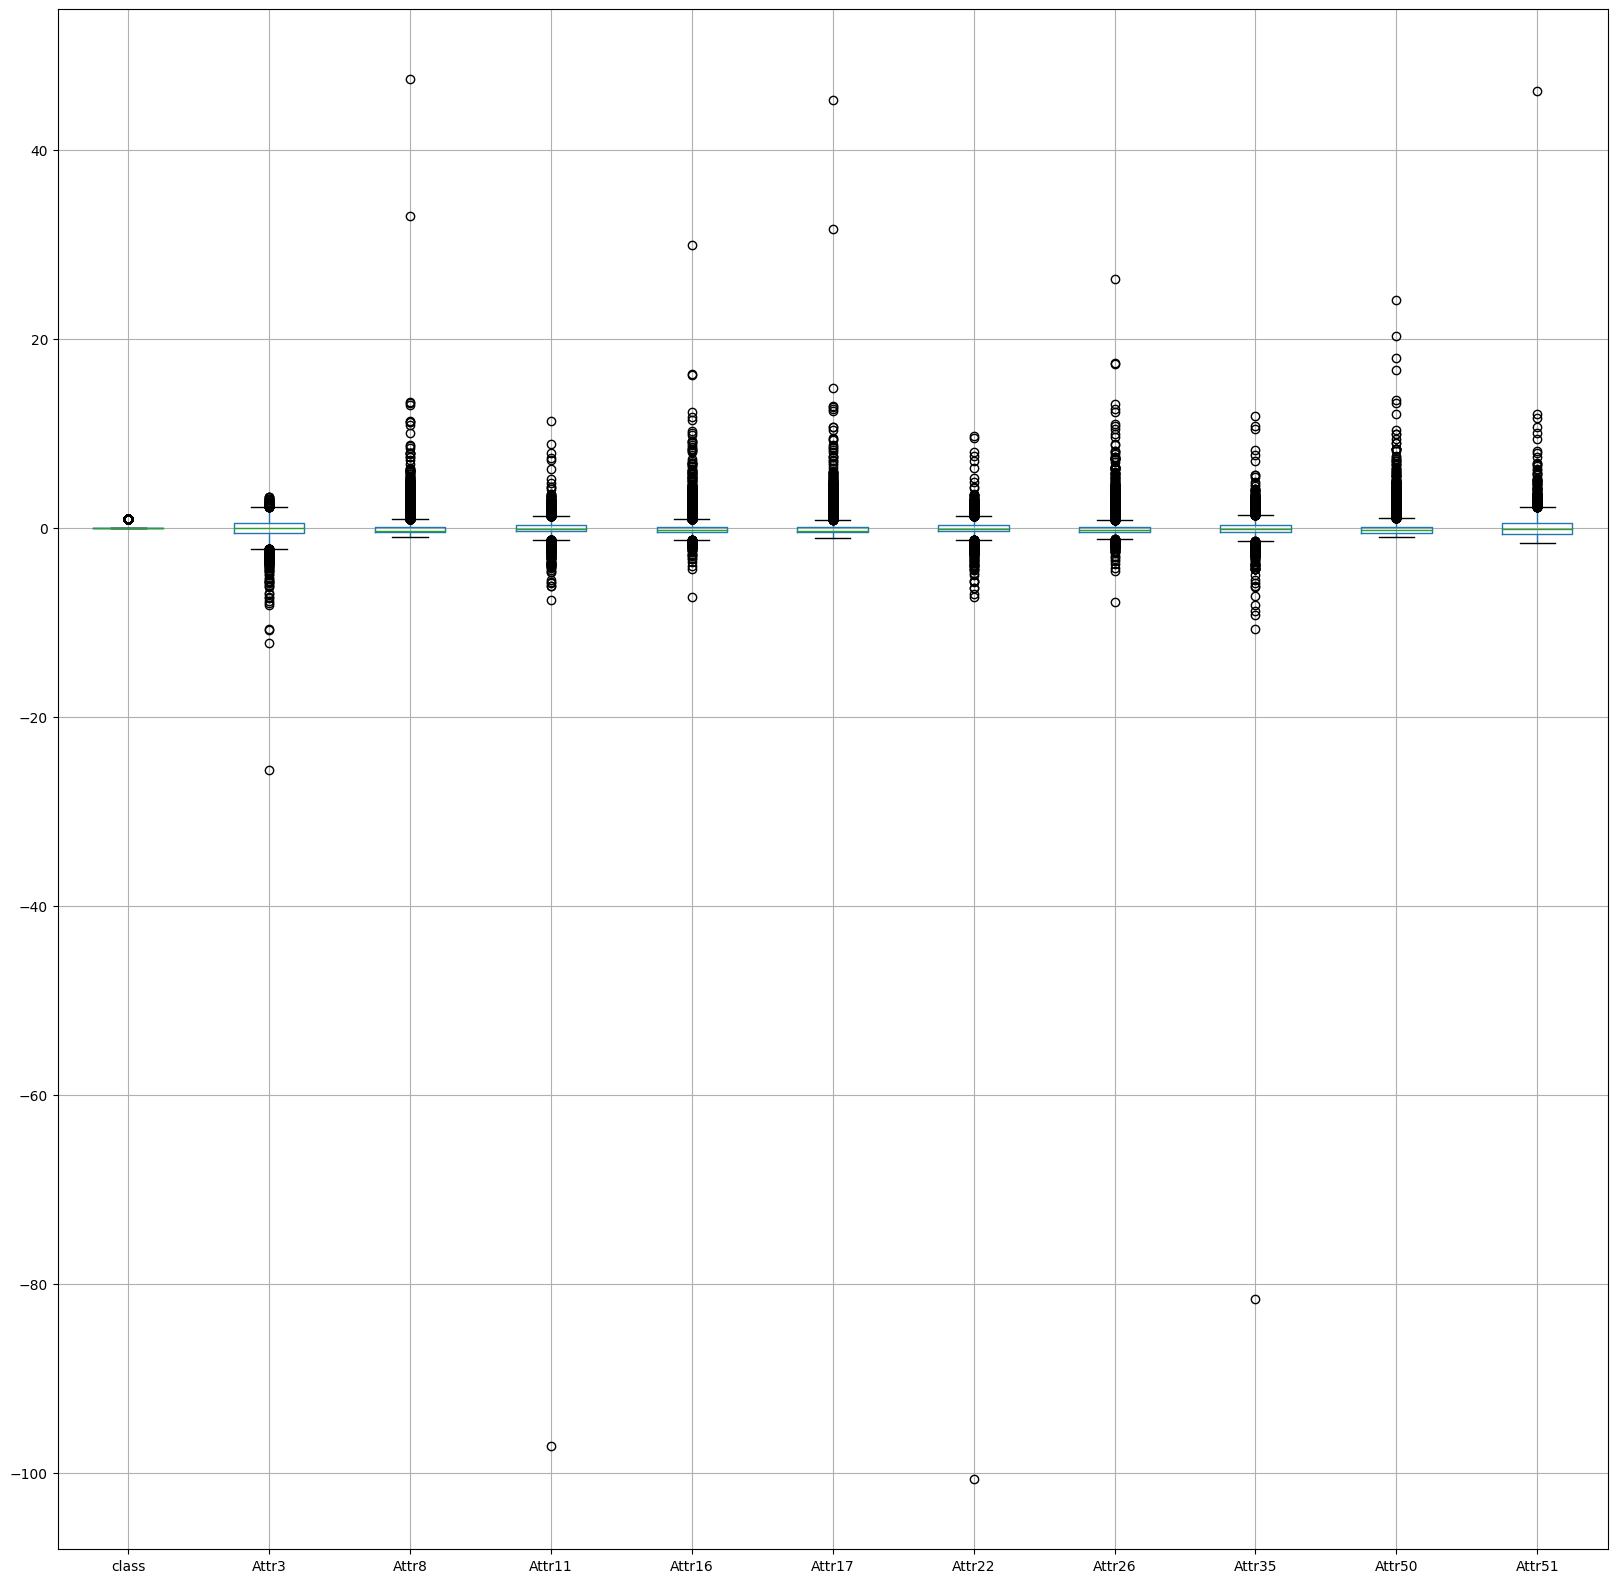

In [6]:
df.boxplot(figsize=(20,20))

In [18]:
df.hist(figsize=(20,20))


array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'Attr3'}>,
        <AxesSubplot:title={'center':'Attr8'}>],
       [<AxesSubplot:title={'center':'Attr11'}>,
        <AxesSubplot:title={'center':'Attr16'}>,
        <AxesSubplot:title={'center':'Attr17'}>],
       [<AxesSubplot:title={'center':'Attr22'}>,
        <AxesSubplot:title={'center':'Attr26'}>,
        <AxesSubplot:title={'center':'Attr35'}>],
       [<AxesSubplot:title={'center':'Attr50'}>,
        <AxesSubplot:title={'center':'Attr51'}>, <AxesSubplot:>]],
      dtype=object)

In [9]:
import seaborn as sns
sns.heatmap(df.corr())
sns.catplot(data=df, x="class", y="Attr3")

In [10]:
plt.scatter(df['class'],df['Attr3'])
plt.scatter(df['class'], df['Attr8'])
plt.title("Bankruptcy vs Financial Data")
plt.xlabel(“Bankruptcy")
plt.ylabel(“Factors")
plt.legend(["Working Capital","Book Value"])


SyntaxError: invalid character '“' (U+201C) (2460658651.py, line 4)

<h2> Check for imbalance

In [ ]:
df['class'].value_counts()
## seems that there are way more classes of zero than of 1

In [ ]:
x = df.drop(columns ="class")
y = df['class']
## assigning independent variables all to X and target variables to y

<h2> Train Test Split & Balancing the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=123)

In [ ]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()
model = SMOTE()
x_train, y_train = model.fit_resample(x_train,y_train)

<h2> Developing a classifier

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
cm= confusion_matrix(y_test,pred)

In [ ]:
cm

In [ ]:
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))
## Adding both the true positive rate and true negative rate divided by the total in the cm

In [ ]:
from sklearn import tree 
model = tree.DecisionTreeClassifier(random_state=123)
model.fit(x_train, y_train)
pred = model.predict(x_test)
cm = confusion_matrix(y_test,pred)



In [ ]:
cm

In [ ]:
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))
